In [1]:
height = 15
width = 30
mapstr = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''
iStart = 1
jStart = 1
iGoal = 13
jGoal = 28
pathLen = 31.9705627
EPS = 0.000001

In [2]:
from env.environment import Map, ManhattanDistance, MakePath, Draw
from algorithms.Astar import Astar, Node

def simple_test(search_algorithm, height, width, mapstr, iStart, jStart, iGoal, jGoal, pathLen, *args):
    taskMap = Map()
    taskMap.ReadFromString(mapstr, width, height)
    start = Node(iStart, jStart)
    goal = Node(iGoal, jGoal)
    
    alg = search_algorithm(taskMap, (iStart, jStart), (iGoal, jGoal), ManhattanDistance)
    result = alg.compute()
    nodesExpanded = result[2]
    nodesOpened = result[3]
    if result[0]:
        path = alg.make_path(result[1])
        correct = abs(path[1] - pathLen) < EPS
        print("Path found! Length: " + str(path[1]) + ". Nodes created: " + str(len(nodesOpened) + len(nodesExpanded)) + ". Number of steps: " + str(len(nodesExpanded)) + ". Correct: " + str(correct))
        Draw(taskMap, start, goal, path[0], nodesExpanded, nodesOpened)
    else:
        print("Path not found!")
        Draw(taskMap, start, goal, None, nodesExpanded, nodesOpened)

Path found! Length: 31.970562748477146. Nodes created: 187. Number of steps: 101. Correct: True


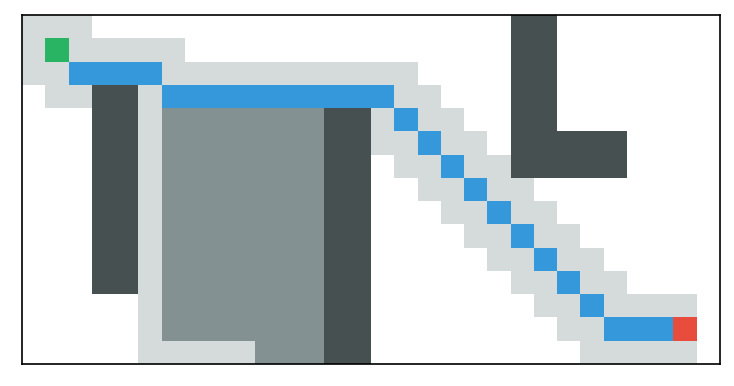

In [3]:
simple_test(Astar, height, width, mapstr, iStart, jStart, iGoal, jGoal, pathLen)

In [4]:
import imageio
import os
from env.pomap import POMap

def move(search_algorithm, height, width, mapstr, iStart, jStart, iGoal, jGoal):
    taskMap = POMap(3)
    taskMap.ReadFromString(mapstr, width, height)
    start = Node(iStart, jStart)
    goal = Node(iGoal, jGoal)
    frames = []
    check = True
    
    while True:
        if start == goal:
            break
        if taskMap.update(start.i, start.j) or check:
            check = False
            alg = search_algorithm(taskMap, (start.i, start.j), (goal.i, goal.j), ManhattanDistance)
            result = alg.compute()
            
            if result[0]:
                path, length = alg.make_path(result[1])
                frames.append(taskMap.draw(start, goal, path))
                start = path[1]
                path= path[1:]
            else:
                print("Path not found!")
                break
        else:
            frames.append(taskMap.draw(start, goal, path))
            start = path[1]
            path= path[1:]
    imageio.mimsave(os.path.join('movie.gif'), frames, duration = 0.1)

In [5]:
move(Astar, height, width, mapstr, iStart, jStart, iGoal, jGoal)